In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('CAERS.csv')

#drop useless columns
df = df.drop(columns=['AGE_UNITS','Unnamed: 12', 'DATE_FDA_FIRST_RECEIVED_REPORT', 'DATE_EVENT','PRODUCT_CODE'])

#drop all the N/A row in the dataset
df = df.dropna(subset = ['PRODUCT','CASE_OUTCOME'])

#take out all those with the age of 110 or above
df = df.query ('PATIENT_AGE < 110')

#rename for easier references
df = df.rename (columns={'CASE_MEDDRA_PREFERRED_TERMS':'SYMPTOMS'})

#put every variable to lower case for easier reference
df['SYMPTOMS'] = df['SYMPTOMS'].str.lower()
df['PRODUCT'] = df['PRODUCT'].str.lower()

#remove all exemption 4 products
df = df.drop(df[df['PRODUCT'] == 'exemption 4'].index)

#reset index so that the index does not jump
df = df.reset_index(drop = True)

df['HOSPITALIZATION']=[1 if 'Hospitalization' or 'Visited Emergency Room' in row else 0 for row in df["CASE_OUTCOME"]]

#df suspect and concomitant
df_sus = df[df['PRODUCT_TYPE'] == "SUSPECT"]
df_con = df[df['PRODUCT_TYPE'] == "CONCOMITANT"]

display(df)

,REPORT_ID,PRODUCT_TYPE,PRODUCT,DESCRIPTION,PATIENT_AGE,SEX,SYMPTOMS,CASE_OUTCOME,HOSPITALIZATION
0,2023-CFS-006722,SUSPECT,airline food served by united airlines,Mult Food Dinner/Grav/Sauce/Special,45.0,Male,"diarrhoea, food poisoning, pyrexia, tremor, vo...",Other Serious or Important Medical Event,1
1,2023-CFS-006717,SUSPECT,metamucil,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,Female,"pain, vomiting","Hospitalization, Other Serious or Important Me...",1
2,2023-CFS-006712,SUSPECT,coke zero,Soft Drink/Water,65.0,Male,"disorientation, fatigue, seizure","Life Threatening, Hospitalization, Other Serio...",1
3,2023-CFS-006687,SUSPECT,huel black edition,Mult Food Dinner/Grav/Sauce/Special,39.0,Male,food poisoning,Other Serious or Important Medical Event,1
4,2023-CFS-006682,SUSPECT,ginkgo biloba,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,Female,"cardiac failure, death, hypoglycaemia, renal f...","Death, Hospitalization",1
...,...,...,...,...,...,...,...,...,...
96470,73153,SUSPECT,trader joe's cream of salmon soup,Soup,45.0,Female,"chest pain, dizziness, dyspnoea, hypoaesthesia...","Required Intervention, Visited Emergency Room",1
96471,67970,SUSPECT,crown prince sardines in tomato sauce,Fishery/Seafood Prod,72.0,Female,"abdominal pain upper, diarrhoea, vomiting","Visited Emergency Room, Visited a Health Care ...",1
96472,80767,SUSPECT,xenadrine rfa-1,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,Female,"coronary artery dissection, coronary artery em...","Life Threatening, Hospitalization",1
96473,83971,SUSPECT,minute maid grape juice,Fruit/Fruit Prod,1.0,NaN,"abdominal pain upper, diarrhoea, gastrointesti...",Other Outcome,1


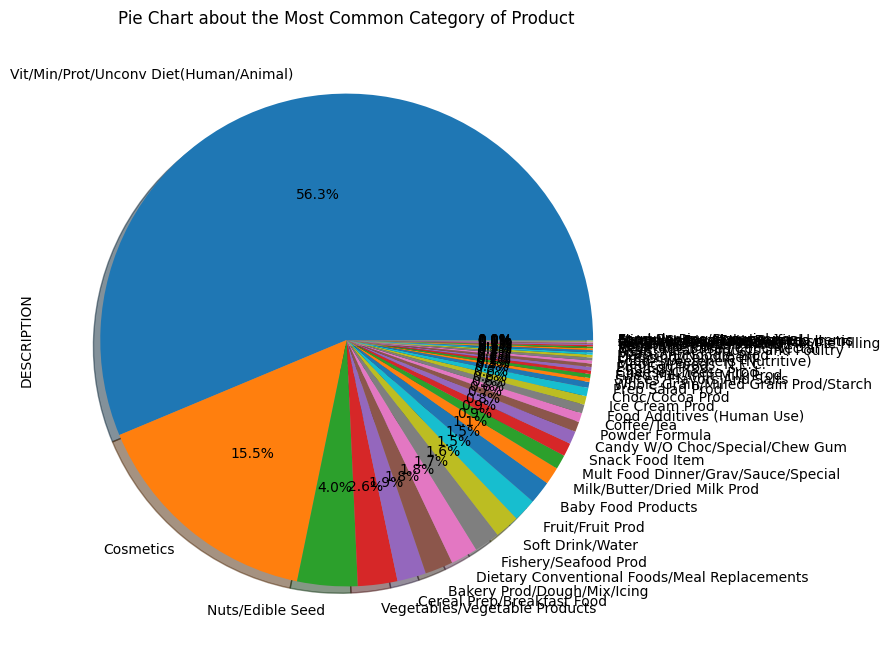

In [ ]:
# Code for generating the pie chart

df_sus['DESCRIPTION'].value_counts().plot.pie(
    figsize=(8,8),
    autopct='%1.1f%%',
    # explode=explode,
    shadow=True)
plt.title('Pie Chart about the Most Common Category of Product')
plt.show()

In [ ]:
df['HOSPITALIZATION']=[1 if 'Hospitalization' or 'Visited Emergency Room' in row else 0 for row in df["CASE_OUTCOME"]]

In [ ]:
display(df_sus)
display(df_con)

,REPORT_ID,PRODUCT_TYPE,PRODUCT,DESCRIPTION,PATIENT_AGE,SEX,SYMPTOMS,CASE_OUTCOME,HOSPITALIZATION
0,2023-CFS-006722,SUSPECT,airline food served by united airlines,Mult Food Dinner/Grav/Sauce/Special,45.0,Male,"diarrhoea, food poisoning, pyrexia, tremor, vo...",Other Serious or Important Medical Event,1
1,2023-CFS-006717,SUSPECT,metamucil,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,Female,"pain, vomiting","Hospitalization, Other Serious or Important Me...",1
2,2023-CFS-006712,SUSPECT,coke zero,Soft Drink/Water,65.0,Male,"disorientation, fatigue, seizure","Life Threatening, Hospitalization, Other Serio...",1
3,2023-CFS-006687,SUSPECT,huel black edition,Mult Food Dinner/Grav/Sauce/Special,39.0,Male,food poisoning,Other Serious or Important Medical Event,1
4,2023-CFS-006682,SUSPECT,ginkgo biloba,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,Female,"cardiac failure, death, hypoglycaemia, renal f...","Death, Hospitalization",1
...,...,...,...,...,...,...,...,...,...
96470,73153,SUSPECT,trader joe's cream of salmon soup,Soup,45.0,Female,"chest pain, dizziness, dyspnoea, hypoaesthesia...","Required Intervention, Visited Emergency Room",1
96471,67970,SUSPECT,crown prince sardines in tomato sauce,Fishery/Seafood Prod,72.0,Female,"abdominal pain upper, diarrhoea, vomiting","Visited Emergency Room, Visited a Health Care ...",1
96472,80767,SUSPECT,xenadrine rfa-1,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,Female,"coronary artery dissection, coronary artery em...","Life Threatening, Hospitalization",1
96473,83971,SUSPECT,minute maid grape juice,Fruit/Fruit Prod,1.0,NaN,"abdominal pain upper, diarrhoea, gastrointesti...",Other Outcome,1


,REPORT_ID,PRODUCT_TYPE,PRODUCT,DESCRIPTION,PATIENT_AGE,SEX,SYMPTOMS,CASE_OUTCOME,HOSPITALIZATION
10,2023-CFS-006669,CONCOMITANT,super krill b oil,Vit/Min/Prot/Unconv Diet(Human/Animal),56.0,Male,"burning sensation, erythema, pruritus, rash, s...",Other Outcome,1
11,2023-CFS-006669,CONCOMITANT,naturemade multivitamin,Vit/Min/Prot/Unconv Diet(Human/Animal),56.0,Male,"burning sensation, erythema, pruritus, rash, s...",Other Outcome,1
13,2023-CFS-006668,CONCOMITANT,magnesium,Vit/Min/Prot/Unconv Diet(Human/Animal),26.0,Female,"abdominal pain, fatigue, hepatitis a, jaundice...","Hospitalization, Disability, Other Serious Out...",1
14,2023-CFS-006668,CONCOMITANT,b12,Vit/Min/Prot/Unconv Diet(Human/Animal),26.0,Female,"abdominal pain, fatigue, hepatitis a, jaundice...","Hospitalization, Disability, Other Serious Out...",1
15,2023-CFS-006668,CONCOMITANT,vit d,Vit/Min/Prot/Unconv Diet(Human/Animal),26.0,Female,"abdominal pain, fatigue, hepatitis a, jaundice...","Hospitalization, Disability, Other Serious Out...",1
...,...,...,...,...,...,...,...,...,...
96404,87306,CONCOMITANT,butter,Milk/Butter/Dried Milk Prod,60.0,Female,"blister, burning sensation, dyspepsia, hyperse...","Visited Emergency Room, Visited a Health Care ...",1
96405,87306,CONCOMITANT,salt,"Spices, Flavors And Salts",60.0,Female,"blister, burning sensation, dyspepsia, hyperse...","Visited Emergency Room, Visited a Health Care ...",1
96406,87306,CONCOMITANT,sugar,Food Sweeteners (Nutritive),60.0,Female,"blister, burning sensation, dyspepsia, hyperse...","Visited Emergency Room, Visited a Health Care ...",1
96452,86645,CONCOMITANT,este lauder eye makeup,Cosmetics,48.0,Female,"blister, burning sensation, erythema, pruritus",Visited Emergency Room,1


In [ ]:
df_sus['DESCRIPTION'].describe()
df_sus_cream = df_sus[df_sus['PRODUCT'] == "jif creamy peanut butter"]
display (df_sus_cream)

,REPORT_ID,PRODUCT_TYPE,PRODUCT,DESCRIPTION,PATIENT_AGE,SEX,SYMPTOMS,CASE_OUTCOME,HOSPITALIZATION
134,2023-CFS-006270,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,16.0,Male,"diarrhoea, nausea, vomiting",Other Serious or Important Medical Event,1
136,2023-CFS-006267,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,48.0,Female,"diarrhoea, nausea, vomiting",Other Serious or Important Medical Event,1
1084,2023-CFS-003859,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,37.0,Female,"diarrhoea, dizziness, fatigue",Other Serious Outcome,1
1780,2023-CFS-002292,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,35.0,Male,"chills, diarrhoea, dizziness, fatigue, headach...",Other Serious Outcome,1
3630,2022-CFS-016675,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,53.0,Female,"diarrhoea, feeling hot, flatulence, headache, ...",Other Serious or Important Medical Event,1
...,...,...,...,...,...,...,...,...,...
89154,110673,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,9.0,NaN,"diarrhoea, vomiting",Other Outcome,1
89156,110530,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,28.0,NaN,"diarrhoea, nausea",Other Outcome,1
89279,110092,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,19.0,Female,"headache, vomiting",Other Outcome,1
89462,110407,SUSPECT,jif creamy peanut butter,Nuts/Edible Seed,9.0,Female,"abdominal pain, diarrhoea, malaise, vomiting",Other Outcome,1


In [ ]:
df_sus_super = df_sus[df_sus['PRODUCT'] == "super beta prostate"]
display (df_sus_super)

,REPORT_ID,PRODUCT_TYPE,PRODUCT,DESCRIPTION,PATIENT_AGE,SEX,SYMPTOMS,CASE_OUTCOME,HOSPITALIZATION
14355,2021-CFS-006418,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),72.0,NaN,"nephrolithiasis, pain","Hospitalization, Visited a Health Care Provider",1
20799,2020-CFS-004462,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),56.0,Male,haematospermia,"Other Serious or Important Medical Event, Othe...",1
21215,2020-CFS-003525,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),82.0,Male,cerebrovascular accident,"Other Serious or Important Medical Event, Visi...",1
23019,2020-CFS-001958,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),75.0,Male,prostate cancer,Other Serious or Important Medical Event,1
23277,2020-CFS-001743,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),69.0,Male,"dyspepsia, hypertension","Other Serious or Important Medical Event, Visi...",1
...,...,...,...,...,...,...,...,...,...
63181,180624,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),61.0,Male,"asthenia, dyspnoea, myocardial infarction","Life Threatening, Hospitalization",1
67592,174313,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),75.0,Male,dyspnoea,Hospitalization,1
67594,174311,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),82.0,Male,suicidal ideation,Life Threatening,1
71701,168091,SUSPECT,super beta prostate,Vit/Min/Prot/Unconv Diet(Human/Animal),80.0,Male,"abnormal faeces, chest pain, prostatomegaly",Required Intervention,1


In [ ]:
df_sus_prevision = df_sus[df_sus['PRODUCT'] == "preservision areds 2"]
display (df_sus_prevision)

,REPORT_ID,PRODUCT_TYPE,PRODUCT,DESCRIPTION,PATIENT_AGE,SEX,SYMPTOMS,CASE_OUTCOME,HOSPITALIZATION
35,2023-CFS-006546,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),88.0,Male,"impaired driving ability, visual impairment",Other Serious or Important Medical Event,1
112,2023-CFS-006280,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),87.0,Female,macular degeneration,Other Serious or Important Medical Event,1
114,2023-CFS-006278,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),87.0,Male,blindness unilateral,Other Serious or Important Medical Event,1
190,2023-CFS-006106,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),72.0,Male,copper deficiency,Other Serious or Important Medical Event,1
285,2023-CFS-005821,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),73.0,Female,"choking, foreign body in throat",Other Serious or Important Medical Event,1
...,...,...,...,...,...,...,...,...,...
43032,211335,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),71.0,Male,"condition aggravated, foreign body, retinal ha...",Other Serious or Important Medical Event,1
45023,206776,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),72.0,Female,"joint swelling, pruritus",Other Serious or Important Medical Event,1
46862,204510,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),85.0,Male,"depression, fatigue",Disability,1
52773,196066,SUSPECT,preservision areds 2,Vit/Min/Prot/Unconv Diet(Human/Animal),89.0,Male,"cough, dysphagia, foreign body, retching, visu...","Other Serious or Important Medical Event, Visi...",1


In [ ]:
df_sus['PRODUCT'].value_counts()

jif creamy peanut butter                                            532
super beta prostate                                                 525
preservision areds 2                                                491
centrum silver women's 50+ (multiminerals, multivitamins) tablet    368
wen cleansing conditioner                                           348
                                                                   ... 
garner skin active micellar water makeup cleaner                      1
bausch + lomb ocuvite adult 50+ capsules                              1
bausch + lomb ocuvite adult 50+ minigels                              1
protandim nrf1                                                        1
gero vita arthro 7                                                    1
Name: PRODUCT, Length: 41410, dtype: int64

In [ ]:
df_con['PRODUCT'].value_counts()

vitamin d                  1496
multivitamin               1112
fish oil                    972
vitamin c                   909
calcium                     907
                           ... 
super c complex w/rutin       1
super papaya enzvme           1
bioflex                       1
emu oil-s                     1
este lauder eye makeup        1
Name: PRODUCT, Length: 8506, dtype: int64

In [ ]:
df_sus_hospital = df_sus[df_sus['PRODUCT'] == "vitamin d"]
df_sus_hospital = df_sus_hospital.reset_index(drop=True)
display (df_sus_hospital)

,REPORT_ID,PRODUCT_TYPE,PRODUCT,DESCRIPTION,PATIENT_AGE,SEX,SYMPTOMS,CASE_OUTCOME,HOSPITALIZATION
0,2023-CFS-000883,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),59.1,Female,"asthenia, neuralgia","Life Threatening, Disability, Other Serious or...",1
1,2022-CFS-009429,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),43.0,Female,"hospitalisation, poisoning","Life Threatening, Hospitalization, Disability,...",1
2,2022-CFS-006164,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),17.0,Male,"abnormal behaviour, suicide attempt",Hospitalization,1
3,2022-CFS-005488,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),83.0,Female,renal disorder,Other Serious or Important Medical Event,1
4,2021-CFS-012741,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),74.0,Female,"asthenia, chills, dizziness, fatigue, malaise,...","Other Serious or Important Medical Event, Visi...",1
5,2021-CFS-012062,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),23.0,Female,hospitalisation,"Life Threatening, Hospitalization, Congenital ...",1
6,2021-CFS-002363,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),20.0,Male,"nausea, vomiting, weight decreased","Hospitalization, Visited Emergency Room",1
7,2020-CFS-012920,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),43.0,Male,"abdominal pain, diarrhoea",Other Serious or Important Medical Event,1
8,2020-CFS-010999,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),81.4,Female,"blood pressure increased, myocardial infarction",Hospitalization,1
9,2019-CFS-011575,SUSPECT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),79.0,Female,malaise,Hospitalization,1


In [ ]:
df_con_hospital = df_con[df_con['PRODUCT'] == "vitamin d"]
df_con_hospital = df_con_hospital.reset_index(drop=True)
display (df_con_hospital)

,REPORT_ID,PRODUCT_TYPE,PRODUCT,DESCRIPTION,PATIENT_AGE,SEX,SYMPTOMS,CASE_OUTCOME,HOSPITALIZATION
0,2023-CFS-006602,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),17.0,Female,"abdominal discomfort, aphonia, application sit...",Other Outcome,1
1,2023-CFS-006542,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),75.0,Female,"alopecia, dysphagia, ear discomfort, oropharyn...","Other Serious or Important Medical Event, Visi...",1
2,2023-CFS-006202,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),59.4,Male,diarrhoea,Other Serious Outcome,1
3,2023-CFS-006152,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),51.4,Female,"alopecia, hair growth abnormal, headache","Other Serious or Important Medical Event, Othe...",1
4,2023-CFS-005934,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),64.0,Female,"dysphagia, hypersensitivity","Other Serious or Important Medical Event, Alle...",1
...,...,...,...,...,...,...,...,...,...
1491,101420,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),67.0,Female,"breast cancer, choking, foreign body trauma, o...","Other Serious or Important Medical Event, Othe...",1
1492,101116,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),76.0,Female,"urinary incontinence, uterine cancer","Other Serious or Important Medical Event, Othe...",1
1493,100916,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Female,"dyspnoea, erythema, laryngospasm, oropharyngea...","Required Intervention, Other Serious or Import...",1
1494,99626,CONCOMITANT,vitamin d,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,Male,"cholelithiasis obstructive, hepatic enzyme inc...",Visited a Health Care Provider,1


In [ ]:
df['HOSPITALIZATION']=[1 if 'Hospitalization' or 'Visited Emergency Room' in row else 0 for row in df["CASE_OUTCOME"]]